In [3]:
import numpy as np
import pandas as pd
import os

In [5]:
testing_letter = pd.read_csv(r'C:\Users\poona\Desktop\Sem7\A2\emnist-letters-test.csv')
training_letter = pd.read_csv(r'C:\Users\poona\Desktop\Sem7\A2\emnist-letters-train.csv')

In [6]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [7]:
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)

y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


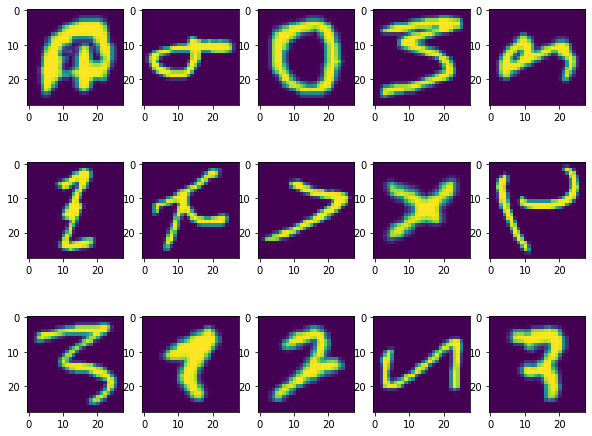

In [8]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [9]:
import tensorflow as tf

In [10]:
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [11]:
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [15]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [18]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.8287
Epoch 1: val_accuracy improved from -inf to 0.88119, saving model to Best_points.h5
2220/2220 [==============================] - 212s 94ms/step - loss: 0.5502 - accuracy: 0.8287 - val_loss: 0.3744 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 2/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.9081
Epoch 2: val_accuracy improved from 0.88119 to 0.89876, saving model to Best_points.h5
2220/2220 [==============================] - 238s 107ms/step - loss: 0.2797 - accuracy: 0.9081 - val_loss: 0.3429 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 3/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2210 - accuracy: 0.9267
Epoch 3: val_accuracy improved from 0.89876 to 0.90867, saving model to Best_points.h5
2220/2220 [==============================] - 216s 97ms/step - loss: 0.2210 - accuracy: 0.9267 - val_loss: 0.3223 - val_accuracy: 0.9087 - lr: 0.0010


In [18]:
import seaborn as sns

Text(0, 0.5, 'Accuracy')

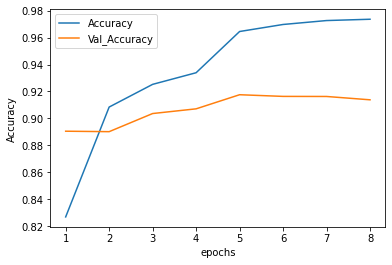

In [20]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')